In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size':16})

## **PH10102 Python Programming Coursework April 2023**

### **Introduction**
This work addresses Planck's Radiation Law in question 1 and the phenomenon of diffraction in question 2. The report is divided in two parts, each one focusing on one question. Each part discusses both the Python script and the approach/methods used to design and test the programs and presents the results of the Python programs. Two additional Python files go with this Jupyter notebook, one used in answering Q1(b) and one used in answering Q2(b).

Regarding the computational methods, the main Python libraries used are NumPy and Matplotlib, from which the trigonometric functions and general numerical methods have been taken and with which the basic functionality of plotting has been performed. Other specific functions such as the Newton-Raphson method and the Trapezium integration method functions have been written manually.

### **Question 1**
Planck's law is a fundamental law in physics that describes the spectral distribution of electromagnetic radiation emitted by a black body at a given temperature. Planck's radiation law is given by
\begin{align}
\rho(\lambda)d\lambda = \displaystyle \frac{8 \pi h c}{\lambda^5 (e^{\frac{hc}{\lambda k T}}-1)}d\lambda,\tag{1}
\end{align}
where $\lambda$ is the wavelength at which the radiation is observed, $h$ is Planck's constant, $c$ is the velocity of light, $k$ is Boltzmann's constant and $T$ is surface temperature of the emiting blackbody [1].

The formula shows that the spectral radiance of a black body at a given temperature is a function of the wavelength and that the peak of the radiation spectrum shifts towards shorter wavelengths as the temperature increases. This is known as Wien's displacement law, which is a consequence of Planck's law. To derive Wien's displacement law from Planck's law, it is useful to make a change of variable to get rid of wavelength and temperature in the turning point equation $\left(\frac{d\rho}{dx}=0\right)$ and so get the constant in the formula that works for all $\lambda T$, with the new variable being $x=\frac{hc}{\lambda kT}$.

First, we have
\begin{align}
\rho(\lambda) = \displaystyle \frac{8 \pi h c}{\lambda^5 (e^{\frac{hc}{\lambda k T}}-1)}.\tag{2}
\end{align}
In terms of $x$,
\begin{align}
\rho(x) = \displaystyle \frac{8 \pi x^5 k^5 T^5}{h^4 c^4 (e^x-1)}.\tag{3}
\end{align}
Taking the derivative,
\begin{align}
\frac{d\rho(x)}{dx} = \frac{40 \pi x^4 k^5 T^5}{h^4 c^4 (e^x - 1)} - \frac{8 \pi x^5 k^5 T^5 e^x}{h^4 c^4 (e^x - 1)^2} = 0.\tag{4}
\end{align}

Lastly, this expression is simplified to
\begin{align}
e^x(5-x)-5=0.\tag{5}
\end{align}

The problem is then approached as a root finding problem. Once $x$ is got, and knowing that
\begin{align}
\lambda T=\frac{hc}{xk}=\text{constant}\tag{6}
\end{align}
from Wien's displacement law, we get the constant in the expression with the calculated $x$.

The problem is solved here with the Newton-Raphson method. The Newton-Raphson method is an iterative numerical method used to find the roots of a differentiable function. It uses the idea of approximating a function by its tangent line. Starting with an initial guess $x_0$ for the root of the function $f(x)$, the method computes the equation of the tangent line at $x_0$ and finds where it intersects the x-axis, giving a better approximation $x_1$ for the root. The process is then repeated using $x_1$ as the new initial guess, and so on, until the desired level of accuracy is reached.

The formula for the Newton-Raphson method is:

\begin{align}
x_{i+1}=x_i-f(x_i)/f'(x_i)\tag{7}
\end{align}

where $x_i$ and $x_{i+1}$ are the ith and (i+1)th approximations of the root, and $f'(x_i)$ is the derivative of the function $f(x)$ evaluated at $x_i$.

To get an accurate starting point, equation 5 is plotted,

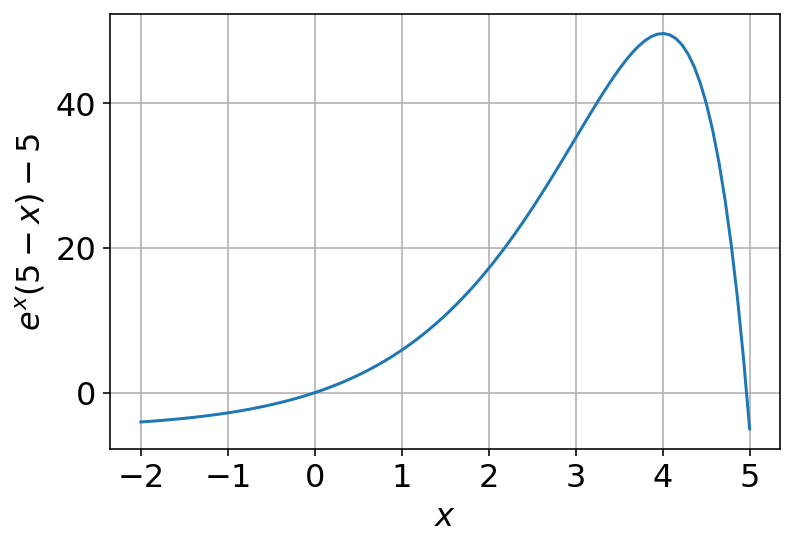

In [2]:
xs = np.linspace(-2, 5, 100)
plt.plot(xs, np.exp(xs)*(5-xs)-5)
plt.xticks([-2, -1, 0, 1, 2, 3, 4, 5])
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$e^x(5-x)-5$")
plt.show()

When $x=0$, equation 6 blows up. Then, $x=5$ is chosen as a starting point, with an accuracy of $\epsilon = 10^{-6}$. In this work, the Newton-Raphson method is used with the numerical derivative.

In [3]:
def numerical_deriv(func, x):
    h = 1e-4
    return (func(x + h / 2) - func(x - h / 2)) / h

def Newton_Raphson_acc(x1, acc, func):
    x = x1
    delta = -func(x) / numerical_deriv(func, x)
    while abs(delta) > acc:
        x += delta
        delta = -func(x) / numerical_deriv(func, x)
    return x

def turning_point(x):
    return np.exp(x)*(5-x)-5

In [4]:
h = 6.62607015e-34
c = 2.99792458e8
k = 1.380649e-23
d = Newton_Raphson_acc(5, 1e-6, turning_point)
constant = h*c/(d*k)
print("The result for the constant is", round(constant, 12), "m·K")

The result for the constant is 0.002897771955 m·K


The obtained value for the constant in Wien's displacement law (equation 6) is $2.897771955 \cdot 10^{-3}$ m $\cdot$ K, which agrees with the tabulated value to that ($10^{-12}$) order of magnitude [2]. As a conclusion, the Newton-Raphson method is an appropiate method to get the constant in Wien's displacement law.

### **Question 2**
Fraunhofer diffraction refers to the diffraction of light that occurs when a coherent light source passes through a narrow slit or aperture and then propagates in a straight line, which is a good approximation at large distances. This results in a pattern of bright and dark fringes, known as a diffraction pattern or interference pattern, that is observed on a screen placed some distance away from the aperture [1].

This question analyses the Fraunhoffer diffraction from a circular aperture, considering the light coming from a star focused on the focal plane of a telescope with circular aperture. The intensity of the light is given by the Airy pattern distribution formula
\begin{align}
I(r)=I_0\left(\frac{2J_1(x)}{x}\right)^2,\tag{8}
\end{align}
where $x = ka \sin \theta = \frac{2\pi}{\lambda}a\frac{r}{R}$ and $J_1(x)$ is a Bessel function.

In order to get the intensity distribution, a function to get the Bessel function results, $J(m, x)$, is created. The trapezium rule is used to integrate the corresponding function. To test this function, first three Bessel functions are plotted using it.

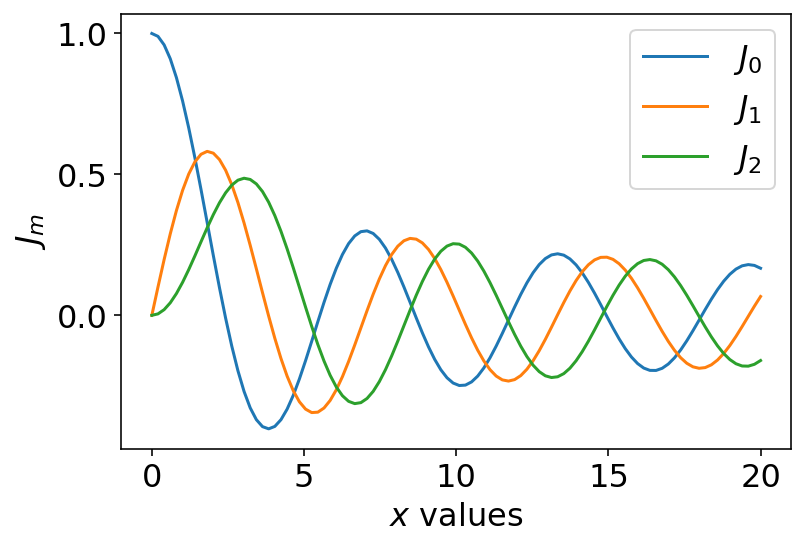

In [5]:
def trapezium_integration(func, a, b, N) -> float:
    x_values = np.linspace(a, b, N+1)
    return (b - a)/N * (0.5 * func(a) + 0.5 *
                        func(b) + sum(func(x_values[1:-1])))

def J(m, x): return trapezium_integration(lambda theta: 1/np.pi*np.cos(m*theta-x*np.sin(theta)), 0, np.pi, 10000)

x_vals = np.linspace(0, 20, 100)
J_0 = [J(0, x) for x in x_vals]
J_1 = [J(1, x) for x in x_vals]
J_2 = [J(2, x) for x in x_vals]

plt.plot(x_vals, J_0, label="$J_0$")
plt.plot(x_vals, J_1, label="$J_1$")
plt.plot(x_vals, J_2, label="$J_2$")
plt.legend()
plt.xlabel("$x$ values")
plt.ylabel("$J_m$")
plt.show()

Since the functions look correct, $J_1(x)$ is used to get the diffraction pattern, with a focal ratio of $\frac{R}{2a}=10$. The peak wavelength is set to be 550 nm, assuming a star similar to the Sun.

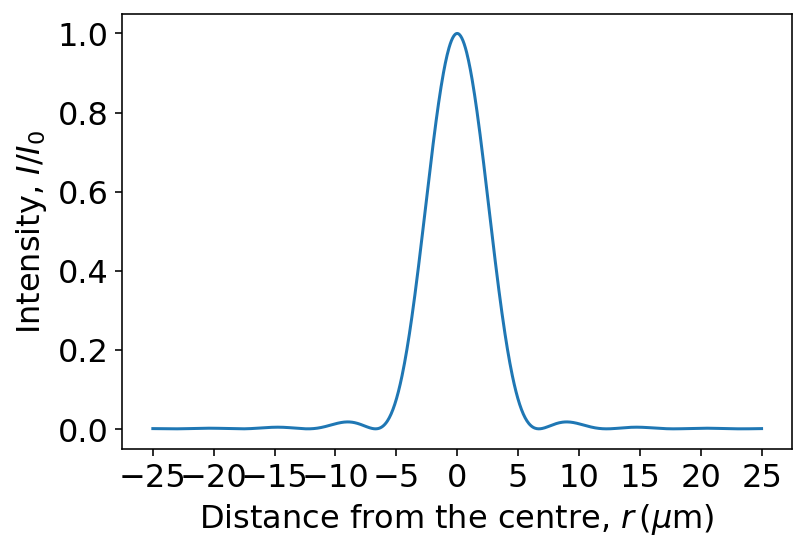

In [6]:
r = np.linspace(-25e-6, 25e-6, 1000)
x_vals = np.abs(np.pi * r / (550e-9 * 10))
I = [(2 * J(1, x) / x) ** 2 for x in x_vals]  # I/I_0
plt.plot(r * 1e6, I)
plt.xlabel("Distance from the centre, $r \, (\mu$m)")
plt.ylabel("Intensity, $I/I_0$")
plt.xticks([-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25])
plt.show()

The shape of the diffraction pattern is the expected $I$ versus $r$. The central area between the central maximum and the minima next to it corresponds to the Airy disk. Further analysis of this pattern could be done analytically, to get the $r$ positions of the maxima an minima and also numerically, by finding the maxima and minima in the intensity array.

A way to get the two-dimensional diffraction pattern on the screen is using a colormap with the possible $x$ and $y$ positions with radius less or equal to 25 micrometers,

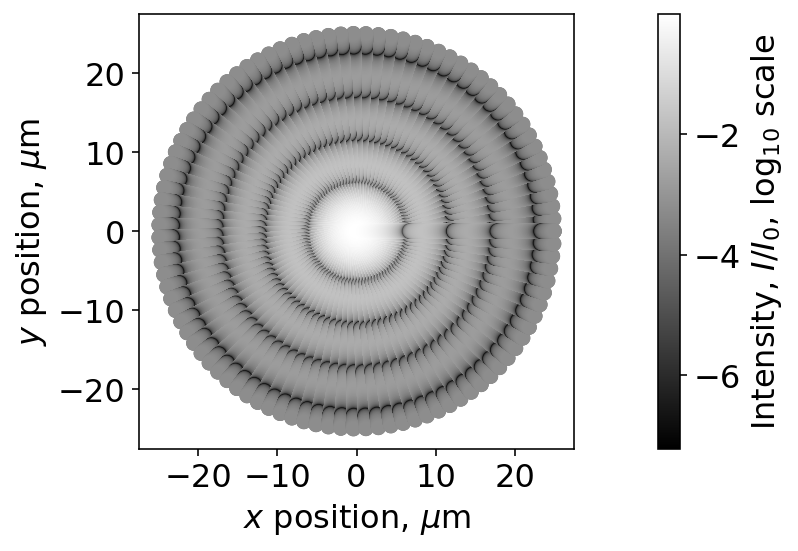

In [7]:
cm = plt.cm.get_cmap('gray')
for theta in np.linspace(0, 2*np.pi, 100):
    sc = plt.scatter(np.abs(r)*1e6*np.cos(theta), np.abs(r)*1e6*np.sin(theta), c=np.log10(I), s=25, marker='o', cmap=cm, lw=2.5)
cbar = plt.colorbar(sc)
cbar.set_label('Intensity, $I/I_0$, log$_{10}$ scale')
plt.axis('square')
plt.xlabel('$x$ position, $\mu$m')
plt.ylabel('$y$ position, $\mu$m')
plt.xticks([-20, -10, 0, 10, 20])
plt.show()

As can be seen, the minima are equispaced in distance from the centre and the value of the maxima of intensity decay as a function of distance. The intesity was colormapped logarithmically since the variation of intensity is small, between 0 and 1 for $I/I_0$.

### **References**
1. Tipler, P. and Mosca, G. (2008) Physics for Scientists and Engineers. 6th Edition, W.H. Freeman and Company.
2. https://physics.nist.gov/cgi-bin/cuu/Value?bwien